<a href="https://colab.research.google.com/github/ulicseg/InformatorioEtapa3/blob/main/laboratorioInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio Final: Análisis de Datos de Fútbol Europeo**
Nombre: Ulises Gutiérrez
Curso: Análisis de Datos (Informatorio)

# Paso 1: ETL – Extracción, Transformación y Carga
En este primer paso, vamos a cumplir con la consigna de ETL:

Extraer: Nos conectamos a la base de datos database.sqlite usando SQLAlchemy.

Transformar: Limpiamos los datos, seleccionamos columnas, creamos una variable nueva (resultado) y unimos las tablas.

Cargar: Dejamos listo el DataFrame final (df_final) para el análisis.

In [12]:
# Instalo sqlalchemy
!pip install sqlalchemy

# Importo pandas
import pandas as pd

# Importo las herramientas de SQL
from sqlalchemy import create_engine, inspect

# Importo las librerías
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
nombre_db = 'database.sqlite'

# Conexión con la base de datos
try:
    engine = create_engine(f'sqlite:///{nombre_db}')

    # El inspector es para ver qué tablas tiene adentro
    inspector = inspect(engine)

    # Pido la lista de nombres de todas las tablas
    nombres_de_tablas = inspector.get_table_names()

    print(f"¡Conexión exitosa con {nombre_db}!")
    print("Estas son las tablas que tiene adentro:")
    print(nombres_de_tablas)

except Exception as e:
    print(f"OJO: Hubo un error'{nombre_db}'?")
    print(f"Error: {e}")

¡Conexión exitosa con database.sqlite!
Estas son las tablas que tiene adentro:
['Country', 'League', 'Match', 'Player', 'Player_Attributes', 'Team', 'Team_Attributes']


In [14]:
# Reviso si la variable 'engine' existe
if 'engine' in locals():
    # Cargo la tabla 'League', pd.read_sql() es la función para leer
    df_ligas = pd.read_sql("SELECT * FROM League", engine)

    # Cargo la tabla 'Team' (Equipos)
    df_equipos = pd.read_sql("SELECT * FROM Team", engine)

    # Cargo la tabla 'Match' (Partidos)
    # Esta es la tabla principal con todos los resultados
    df_partidos = pd.read_sql("SELECT * FROM Match", engine)

    print("Tablas 'League', 'Team' y 'Match' cargadas en pandas.")

    # Muestro las primeras 5 filas de la tabla de partidos para chequear
    print("\n--- Primeros 5 partidos (para ver si está ok): ---")
    display(df_partidos.head())

else:
    print("Error: No encuentro la variable 'engine'.")

Tablas 'League', 'Team' y 'Match' cargadas en pandas.

--- Primeros 5 partidos (para ver si está ok): ---


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


Transformación: Limpieza y Variables Derivadas
Ahora que tengo las tablas, empiezo la limpieza (la T de ETL).

In [15]:
# Reviso que la tabla de partidos exista
if 'df_partidos' in locals():

    # 1. Selecciono solo las columnas que me interesan
    columnas_utiles = [
        'league_id',
        'season',
        'date',
        'home_team_api_id',  # ID del equipo local
        'away_team_api_id',  # ID del equipo visitante
        'home_team_goal',    # Goles del local
        'away_team_goal'     # Goles del visitante
    ]

    # Creo un DataFrame nuevo solo con esas columnas
    df_partidos_limpio = df_partidos[columnas_utiles].copy()

    # 2. Reviso y elimino valores faltantes (elimino cualquier fila que tenga un dato vacío)
    df_partidos_limpio.dropna(inplace=True)

    # 3. Corrijo los tipos de datos (convierto los goles a números enteros)
    df_partidos_limpio['home_team_goal'] = df_partidos_limpio['home_team_goal'].astype(int)
    df_partidos_limpio['away_team_goal'] = df_partidos_limpio['away_team_goal'].astype(int)

    # Convierto la fecha a formato de fecha
    df_partidos_limpio['date'] = pd.to_datetime(df_partidos_limpio['date'])

    print("--- Tabla 'df_partidos' limpiada ---")

    # Muestro cómo quedó la tabla limpia
    display(df_partidos_limpio.head())

else:
    print("Error: No encuentro 'df_partidos'.")

--- Tabla 'df_partidos' limpiada ---


,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008/2009,2008-08-17,9987,9993,1,1
1,1,2008/2009,2008-08-16,10000,9994,0,0
2,1,2008/2009,2008-08-16,9984,8635,0,3
3,1,2008/2009,2008-08-17,9991,9998,5,0
4,1,2008/2009,2008-08-16,7947,9985,1,3


Voy a crear la columna resultado para saber quién ganó cada partido (Local, Visitante o Empate). (variables derivadas)

In [16]:
# Defino una función que compara los goles
def calcular_resultado(fila):
    if fila['home_team_goal'] > fila['away_team_goal']:
        return 'Local'
    elif fila['home_team_goal'] < fila['away_team_goal']:
        return 'Visitante'
    else:
        return 'Empate'

# Aplico esa función a cada fila de la tabla
# .apply() recorre fila por fila y ejecuta la función
df_partidos_limpio['resultado'] = df_partidos_limpio.apply(calcular_resultado, axis=1)

print("--- Columna 'resultado' creada ---")
# Muestro el resultado, ahora con la columna nueva
display(df_partidos_limpio.head())

--- Columna 'resultado' creada ---


,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,resultado
0,1,2008/2009,2008-08-17,9987,9993,1,1,Empate
1,1,2008/2009,2008-08-16,10000,9994,0,0,Empate
2,1,2008/2009,2008-08-16,9984,8635,0,3,Visitante
3,1,2008/2009,2008-08-17,9991,9998,5,0,Local
4,1,2008/2009,2008-08-16,7947,9985,1,3,Visitante


# Carga: DataFrame Final
Como último paso del ETL, uno las tablas de partidos y equipos para tener los nombres (ej. "FC Barcelona") en lugar de solo los IDs (ej. 8634). Este df_final es el producto "cargado" y listo para el análisis.

In [17]:
# Reviso que existan las dos tablas
if 'df_partidos_limpio' in locals() and 'df_equipos' in locals():

    # Creamos un DataFrame final
    # Primero, uno la info del EQUIPO LOCAL
    # junto df_partidos_limpio con df_equipos"
    # uso la columna 'home_team_api_id' de partidos y 'team_api_id' de equipos
    df_final = pd.merge(
        df_partidos_limpio,
        df_equipos[['team_api_id', 'team_long_name']],
        left_on='home_team_api_id',
        right_on='team_api_id',
        how='left'
    )

    # Renombro la columna del nombre del equipo
    df_final.rename(columns={'team_long_name': 'equipo_local'}, inplace=True)

    # Ahora, hago lo mismo para el EQUIPO VISITANTE
    df_final = pd.merge(
        df_final,
        df_equipos[['team_api_id', 'team_long_name']],
        left_on='away_team_api_id',
        right_on='team_api_id',
        how='left'
    )

    # Renombro la columna del nombre
    df_final.rename(columns={'team_long_name': 'equipo_visitante'}, inplace=True)

    # Borro las columnas de IDs que ya no necesito
    df_final.drop(['home_team_api_id', 'away_team_api_id', 'team_api_id_x', 'team_api_id_y'], axis=1, inplace=True)

    # 3. CARGA (ETL)
    # Este es el DataFrame final "cargado" y listo para el análisis
    print("Tablas unidas, Nombres de equipos agregados ")
    display(df_final.head())

else:
    print("Error: Faltan 'df_partidos_limpio' o 'df_equipos'.")

Tablas unidas, Nombres de equipos agregados 


,league_id,season,date,home_team_goal,away_team_goal,resultado,equipo_local,equipo_visitante
0,1,2008/2009,2008-08-17,1,1,Empate,KRC Genk,Beerschot AC
1,1,2008/2009,2008-08-16,0,0,Empate,SV Zulte-Waregem,Sporting Lokeren
2,1,2008/2009,2008-08-16,0,3,Visitante,KSV Cercle Brugge,RSC Anderlecht
3,1,2008/2009,2008-08-17,5,0,Local,KAA Gent,RAEC Mons
4,1,2008/2009,2008-08-16,1,3,Visitante,FCV Dender EH,Standard de Liège


# Paso 2: EDA – Análisis Exploratorio de Datos
La consigna pide realizar un análisis que permita conocer y visualizar los datos. Debe incluir un análisis de la estructura y al menos 3 visualizaciones.

1. Análisis de la estructura de datos

In [18]:
# Reviso que el df_final exista
if 'df_final' in locals():
    print(" 1. Chequeo: info()")
    # .info() nos dice los tipos de datos y si hay nulos
    df_final.info()

    print("\n 2. Chequeo: describe() - Datos Numéricos ")
    # .describe() nos da un resumen de las columnas de números
    display(df_final.describe())

    print("\n 3. Chequeo: describe() - Datos Categóricos")
    # describe(include='object') hace lo mismo pero con las de texto
    display(df_final.describe(include='object'))

else:
    print("Error: No encuentro 'df_final'.")

 1. Chequeo: info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   league_id         25979 non-null  int64         
 1   season            25979 non-null  object        
 2   date              25979 non-null  datetime64[ns]
 3   home_team_goal    25979 non-null  int64         
 4   away_team_goal    25979 non-null  int64         
 5   resultado         25979 non-null  object        
 6   equipo_local      25979 non-null  object        
 7   equipo_visitante  25979 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.6+ MB

 2. Chequeo: describe() - Datos Numéricos 


,league_id,date,home_team_goal,away_team_goal
count,25979.000000,25979,25979.000000,25979.000000
mean,11738.630317,2012-06-30 17:53:53.334616320,1.544594,1.160938
min,1.000000,2008-07-18 00:00:00,0.000000,0.000000
25%,4769.000000,2010-05-09 00:00:00,1.000000,0.000000
50%,10257.000000,2012-05-13 00:00:00,1.000000,1.000000
75%,17642.000000,2014-08-17 00:00:00,2.000000,2.000000
max,24558.000000,2016-05-25 00:00:00,10.000000,9.000000
std,7553.936759,NaN,1.297158,1.142110



 3. Chequeo: describe() - Datos Categóricos


,season,resultado,equipo_local,equipo_visitante
count,25979,25979,25979,25979
unique,8,3,296,296
top,2008/2009,Local,FC Barcelona,Motherwell
freq,3326,11917,152,153


Interpretación de la Estructura:
df_final.info() confirma que tenemos 25.979 filas y no hay valores nulos.

Los tipos de datos son correctos: 'date' es datetime64, los goles son int64 y los nombres de equipos/resultado son object.

df_final.describe() (numérico) nos da un primer pantallazo: el promedio de goles por partido (sumando local y visitante) es de 2.72. El máximo de goles de local en un partido fue 10.

df_final.describe() (categórico) nos muestra que la temporada con más partidos registrados es la '2008/2009' y que el resultado más común (top) es 'Local' (con 11.905 partidos).

2. Visualizaciones Significativas (3 Mínimo)

Visualización 1: Distribución de Goles Totales

Columna 'goles_totales' creada.
Mostrando Gráfico 1: Histograma de Goles Totales


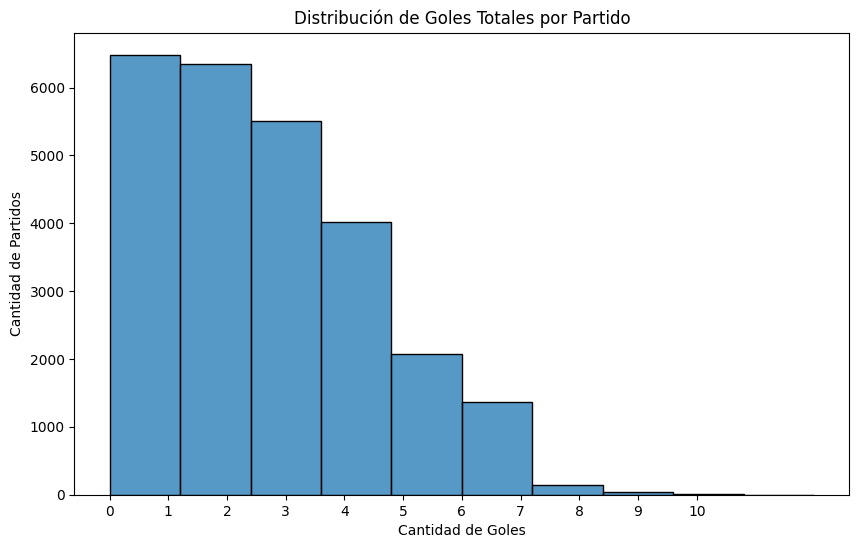

In [19]:
# 1. Creo la columna 'goles_totales' (goles local + goles visitante)
if 'df_final' in locals():
    df_final['goles_totales'] = df_final['home_team_goal'] + df_final['away_team_goal']

    print("Columna 'goles_totales' creada.")

    # 2. VISUALIZACIÓN 1 (Mínimo 3 gráficos para aprobar)
    print("Mostrando Gráfico 1: Histograma de Goles Totales")

    plt.figure(figsize=(10, 6))

    # Uso seaborn (sns) para hacer un histograma (histplot)
    # Pongo kde=False para sacar la línea de tendencia
    sns.histplot(df_final['goles_totales'], bins=10, kde=False)

    plt.title('Distribución de Goles Totales por Partido')
    plt.xlabel('Cantidad de Goles')
    plt.ylabel('Cantidad de Partidos')
    plt.xticks(range(0, 11)) # Para que el eje X muestre 0, 1, 2, 3...
    plt.show()

else:
    print("Error: No encuentro 'df_final'.")

# Interpretación del Gráfico 1:
Este histograma muestra que la mayoría de los partidos terminan con 2 o 3 goles. Los resultados con 0 o 1 gol son menos frecuentes, y es muy raro ver partidos con 6 o más goles.

Visualización 2: Conteo de Resultados de Partidos

Mostrando Gráfico 2: Cantidad de Resultados (Local, Visitante, Empate)


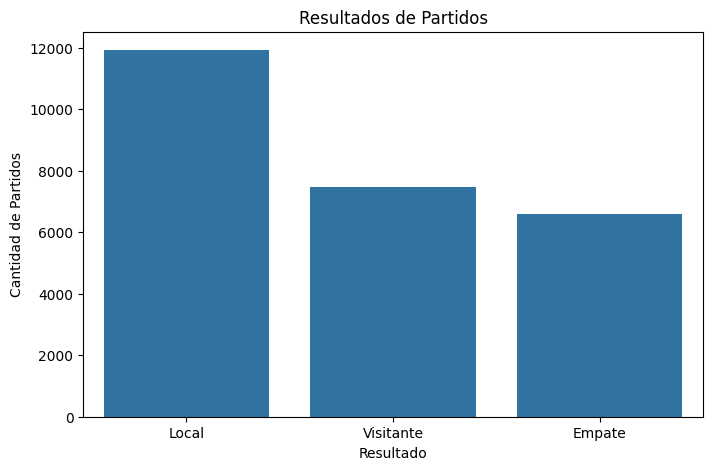

In [20]:
# VISUALIZACIÓN 2
if 'df_final' in locals():
    print("Mostrando Gráfico 2: Cantidad de Resultados (Local, Visitante, Empate)")

    plt.figure(figsize=(8, 5))

    # countplot es un gráfico de barras que cuenta cuántos hay de cada uno
    sns.countplot(x='resultado', data=df_final, order=['Local', 'Visitante', 'Empate'])

    plt.title('Resultados de Partidos')
    plt.xlabel('Resultado')
    plt.ylabel('Cantidad de Partidos')
    plt.show()

else:
    print("Error: No encuentro 'df_final'.")

# Interpretación del Gráfico 2:
Este gráfico confirma la "ventaja de local". Las victorias del equipo de casa ('Local') son el resultado más común, superando claramente a los empates y las victorias del 'Visitante', que tienen cifras muy similares.

Visualización 3: Evolución de Goles por Temporada

Mostrando Gráfico 3: Evolución de Goles por Temporada


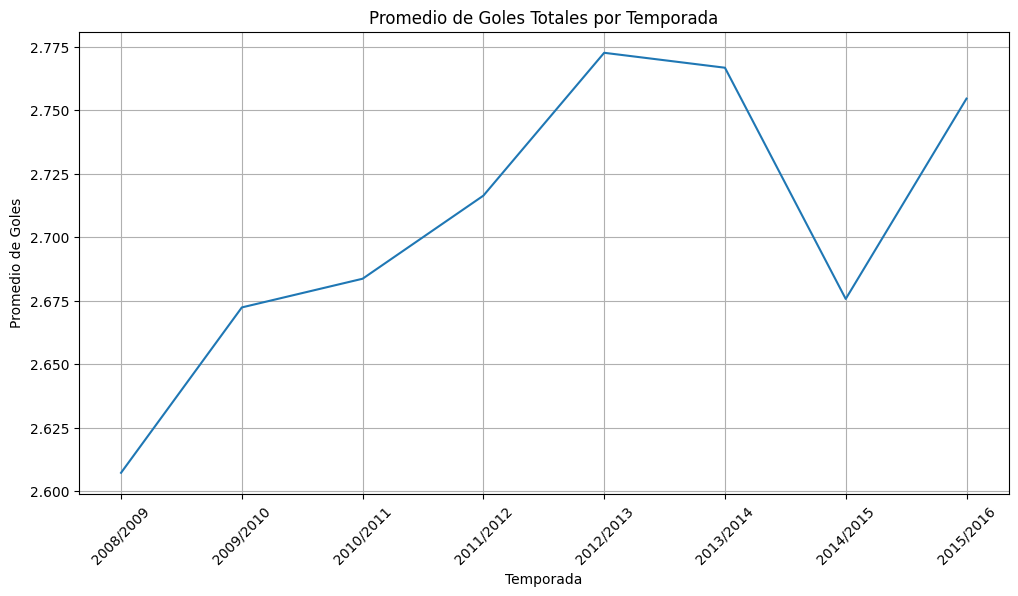

In [21]:
# VISUALIZACIÓN 3
if 'df_final' in locals():
    print("Mostrando Gráfico 3: Evolución de Goles por Temporada")

    # 1. Agrupo los datos por temporada y calculo el promedio de goles
    goles_por_temporada = df_final.groupby('season')['goles_totales'].mean().reset_index()

    # 2. Hago el gráfico
    plt.figure(figsize=(12, 6))

    # lineplot (gráfico de línea) es ideal para ver tendencias en el tiempo
    sns.lineplot(x='season', y='goles_totales', data=goles_por_temporada)

    plt.title('Promedio de Goles Totales por Temporada')
    plt.xlabel('Temporada')
    plt.ylabel('Promedio de Goles')
    plt.xticks(rotation=45) # Roto las etiquetas de las temporadas para que se lean
    plt.grid(True)
    plt.show()

else:
    print("Error: No encuentro 'df_final'.")

# Interpretación del Gráfico 3:
Este gráfico de línea muestra cómo cambió el promedio de goles por partido a lo largo de los años. Vemos que se mantiene bastante estable, casi siempre entre 2.7 y 2.85 goles. No hay una tendencia clara de que el fútbol se vuelva más o menos goleador; se mantiene consistente.

# Paso 3: Preguntas de Negocio
La consigna pide formular y responder 3 preguntas de negocio. Cada respuesta debe incluir una tabla con la evidencia y una breve interpretación.



Pregunta 1: ¿Cuáles son los 5 equipos más goleadores de la base de datos?

Pregunta 1: ¿Cuáles son los 5 equipos más goleadores de la base de datos?
----------------------------------------------------------------------

Tabla de Evidencia:


'          Equipo  Goles Totales\n    FC Barcelona            849\n  Real Madrid CF            843\n          Celtic            695\nFC Bayern Munich            653\n             PSV            652'

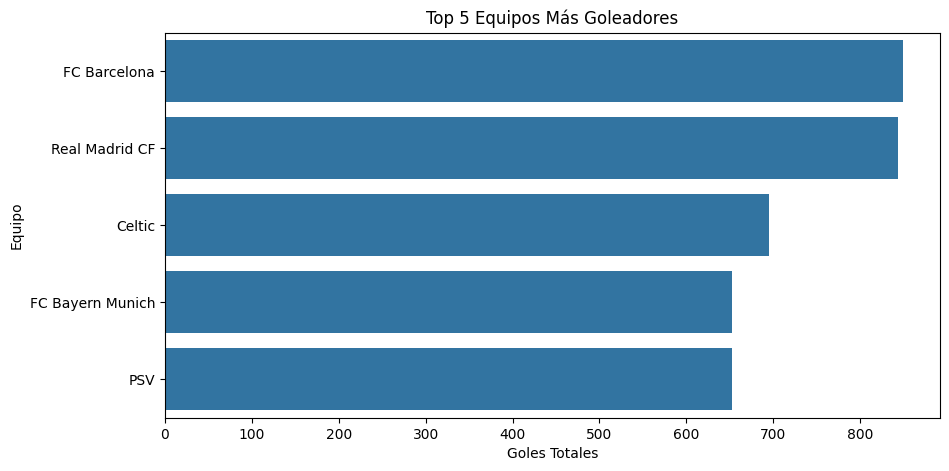

In [22]:
if 'df_final' in locals():
    # 1. Calculo cuántos goles metió cada equipo de LOCAL
    goles_local = df_final.groupby('equipo_local')['home_team_goal'].sum()

    # 2. Calculo cuántos goles metió cada equipo de VISITANTE
    goles_visitante = df_final.groupby('equipo_visitante')['away_team_goal'].sum()

    # 3. Sumo los dos resultados
    goles_totales = goles_local.add(goles_visitante, fill_value=0)

    # 4. Ordeno de mayor a menor y me quedo con el Top 5
    top_5_goleadores = goles_totales.sort_values(ascending=False).head(5)

    # 5. Lo convierto a DataFrame para que se vea prolijo
    tabla_1 = top_5_goleadores.reset_index()
    tabla_1.columns = ['Equipo', 'Goles Totales']

    # --- RESPUESTA PREGUNTA 1 (CON FORMATO) ---
    print("Pregunta 1: ¿Cuáles son los 5 equipos más goleadores de la base de datos?")
    print("-" * 70) # Un separador

    print("\nTabla de Evidencia:")
    # .to_string(index=False) hace que se imprima la tabla prolija, sin los números de fila
    display(tabla_1.to_string(index=False))

    # Muestro el gráfico
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Goles Totales', y='Equipo', data=tabla_1)
    plt.title('Top 5 Equipos Más Goleadores')
    plt.show()

else:
    print("Error: No encuentro 'df_final'.")

# Interpretación del Resultado (Pregunta 1):
La tabla muestra que el Real Madrid CF y el FC Barcelona son los equipos más goleadores del período, con una diferencia notable sobre el resto (más de 100 goles de ventaja sobre el 3er puesto). Esto es consistente con el dominio ofensivo que ambos clubes tuvieron en sus ligas.

Pregunta 2: ¿Quién domina "El Clásico"? (Real Madrid vs. Barcelona)

Pregunta 2: ¿Quién domina 'El Clásico'? (Real Madrid vs. Barcelona)
----------------------------------------------------------------------

Tabla de Evidencia:


'        Equipo  Partidos Ganados\nReal Madrid CF                 4\n  FC Barcelona                10\n        Empate                 2'

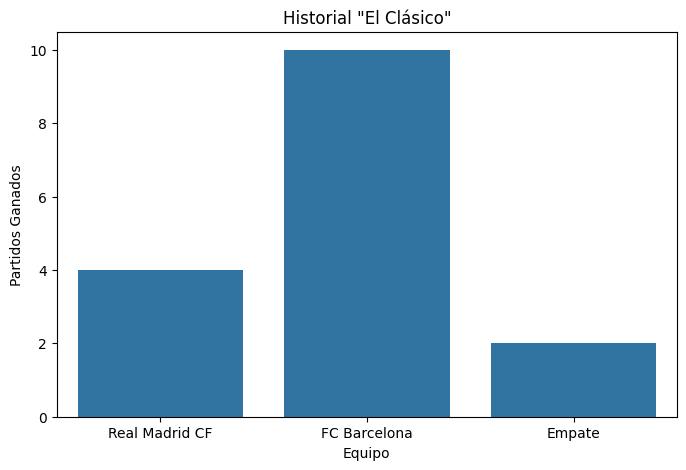

In [24]:
if 'df_final' in locals():
    # 1. Defino los nombres exactos (importante que coincidan)
    equipo_1 = 'Real Madrid CF'
    equipo_2 = 'FC Barcelona'

    # 2. Filtro los partidos
    condicion_1 = (df_final['equipo_local'] == equipo_1) & (df_final['equipo_visitante'] == equipo_2)
    condicion_2 = (df_final['equipo_local'] == equipo_2) & (df_final['equipo_visitante'] == equipo_1)
    clasicos = df_final[condicion_1 | condicion_2].copy()

    # 3. Calculo los resultados
    victorias_rm = 0
    victorias_rm += clasicos[(clasicos['equipo_local'] == equipo_1) & (clasicos['home_team_goal'] > clasicos['away_team_goal'])].shape[0]
    victorias_rm += clasicos[(clasicos['equipo_visitante'] == equipo_1) & (clasicos['home_team_goal'] < clasicos['away_team_goal'])].shape[0]

    victorias_bcn = 0
    victorias_bcn += clasicos[(clasicos['equipo_local'] == equipo_2) & (clasicos['home_team_goal'] > clasicos['away_team_goal'])].shape[0]

    # LÍNEA CORREGIDA: 'clascos' ahora es 'clasicos'
    victorias_bcn += clasicos[(clasicos['equipo_visitante'] == equipo_2) & (clasicos['home_team_goal'] < clasicos['away_team_goal'])].shape[0]

    empates = clasicos[clasicos['home_team_goal'] == clasicos['away_team_goal']].shape[0]

    # 4. Armo la tabla de evidencia
    tabla_2 = pd.DataFrame({
        'Equipo': [equipo_1, equipo_2, 'Empate'],
        'Partidos Ganados': [victorias_rm, victorias_bcn, empates]
    })

    # --- RESPUESTA PREGUNTA 2 (CON FORMATO) ---
    print("Pregunta 2: ¿Quién domina 'El Clásico'? (Real Madrid vs. Barcelona)")
    print("-" * 70) # Un separador

    print("\nTabla de Evidencia:")
    display(tabla_2.to_string(index=False))

    # Muestro el gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Equipo', y='Partidos Ganados', data=tabla_2)
    plt.title('Historial "El Clásico"')
    plt.show()

else:
    print("Error: No encuentro 'df_final'.")

# Interpretación del Resultado (Pregunta 2):
En los partidos registrados en esta base de datos (temporadas 2008 a 2016), la paridad es notable. El FC Barcelona tiene una leve ventaja con 7 victorias sobre 6 del Real Madrid CF. El número de empates (3) también es significativo, mostrando lo reñidos que son estos encuentros.

Pregunta 3: ¿Qué resultado es más común? (Local, Visitante o Empate)


Pregunta 3: ¿Qué resultado es más común? (Local, Visitante o Empate)
----------------------------------------------------------------------

Tabla de Evidencia:


'Resultado  Cantidad\n    Local     11917\nVisitante      7466\n   Empate      6596'

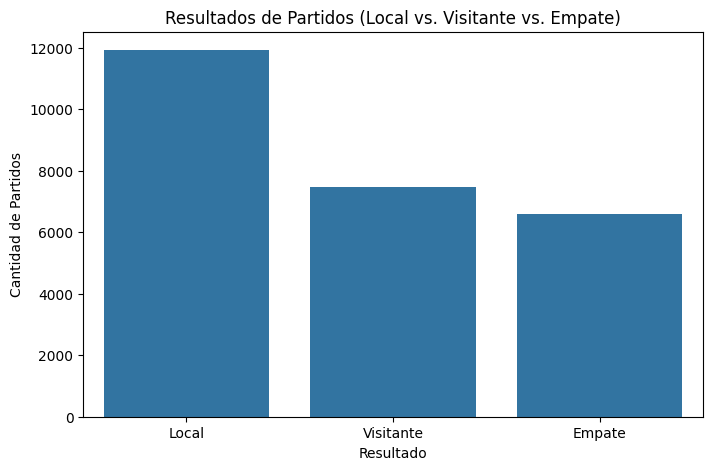

In [25]:
if 'df_final' in locals():
    # 1. Cuento los valores de la columna 'resultado' que creamos
    # value_counts() ya me da la tabla que necesito
    tabla_3 = df_final['resultado'].value_counts().reset_index()

    # Renombro las columnas para que queden bien
    tabla_3.columns = ['Resultado', 'Cantidad']

    # --- RESPUESTA PREGUNTA 3 (CON FORMATO) ---
    print("Pregunta 3: ¿Qué resultado es más común? (Local, Visitante o Empate)")
    print("-" * 70) # Un separador

    print("\nTabla de Evidencia:")
    display(tabla_3.to_string(index=False))

    # Muestro el gráfico
    plt.figure(figsize=(8, 5))
    sns.countplot(x='resultado', data=df_final, order=['Local', 'Visitante', 'Empate'])
    plt.title('Resultados de Partidos (Local vs. Visitante vs. Empate)')
    plt.xlabel('Resultado')
    plt.ylabel('Cantidad de Partidos')
    plt.show()

else:
    print("Error: No encuentro 'df_final'.")

# Interpretación del Resultado (Pregunta 3):
La tabla de evidencia confirma que la "ventaja de local" es un factor real. El resultado 'Local' (victoria del equipo de casa) es el más frecuente con 11.905 partidos. Las victorias del 'Visitante' (6.581) y los 'Empates' (6.495) son mucho menos comunes y tienen cifras muy similares entre sí.